# Time Series Analysis - Part A

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
co2 = sm.datasets.co2.load_pandas().data
co2.index = pd.to_datetime(co2.index, format = '%Y-%m')

### Plot CO2 data

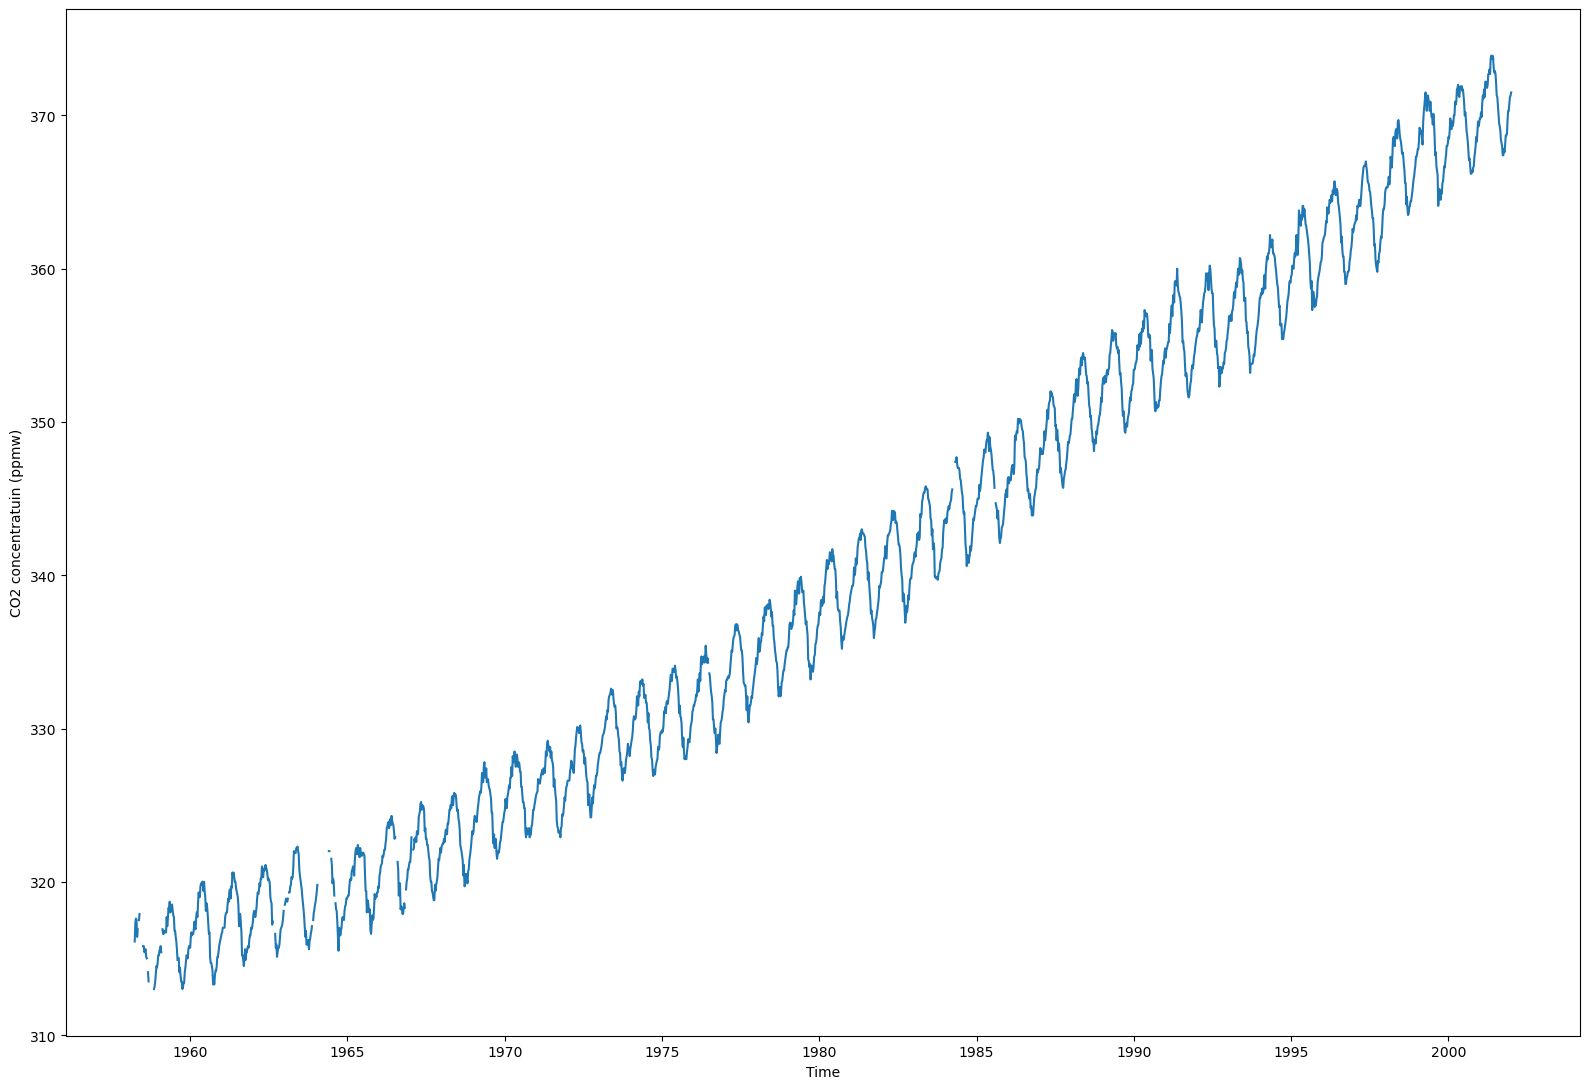

In [3]:
fig, ax = plt.subplots(figsize = (16,11))
ax.plot(co2['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentratuin (ppmw)')
plt.tight_layout()

# I. Exploratory Analysis

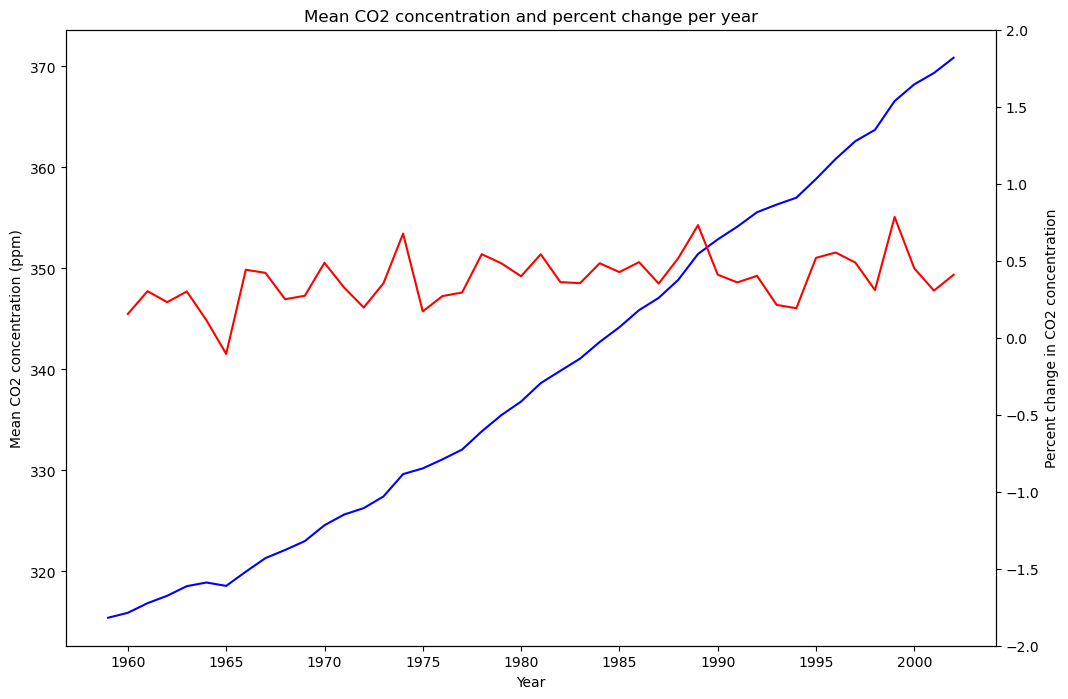

In [4]:
# Compute the mean C02 concentration for each year
co2_mean = co2['co2'].resample('Y').mean()

# Compute the percent change in C02 concentration for each year
co2_pct_change = co2_mean.pct_change()*100

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean C02 concentration
ax1.plot(co2_mean.index, co2_mean, color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean CO2 concentration (ppm)')

# Create a second y-axis for percent change
ax2 = ax1.twinx()

# Plot the percent change in C02 concentration
ax2.plot(co2_pct_change.index, co2_pct_change, color='r')
ax2.set_ylabel('Percent change in CO2 concentration')
ax2.set_ylim([-2, 2])

plt.title('Mean CO2 concentration and percent change per year')
plt.show()

# II. Time Series Segmentation

In [5]:
!pip install ruptures

True breakpoints:[308, 661, 1000]
Detected breakpoints:[310, 660, 1000]


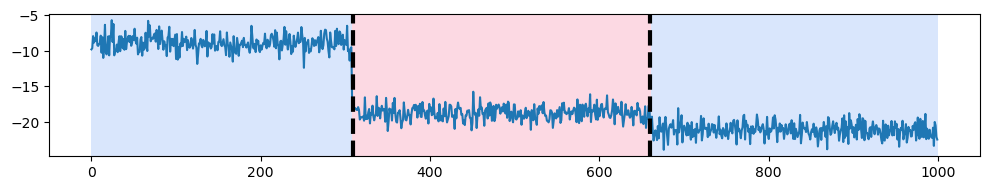

In [6]:
import ruptures as rpt

#genearte sample data in form of a signal
n_samples, n_dims, sigma = 1000, 1, 1

n_bkps = 2 # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std = sigma)
print('True breakpoints:{}'.format(bkps))

# detection
algo = rpt.Dynp(model = "l2").fit(signal) 
result = algo.predict(n_bkps = 2)

print('Detected breakpoints:{}'.format(result))

# display segmentation
rpt. display(signal, bkps, result)
plt.show()

# llla. Moving Average

In [7]:
!pip install yfinance

In [12]:
import yfinance as yf
import datetime as dt
# Set the start and end date for the data
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2020, 1, 1)

# Get stock data from Yahoo Finance
df = yf.download("AAPL", start="2018-01-01", end="2020-04-30")

# Calculate the 20-day and 50-day moving averages
ma20 = df['Close'].rolling(window=20).mean()
ma50 = df['Close'].rolling(window=50).mean()

[*********************100%***********************]  1 of 1 completed


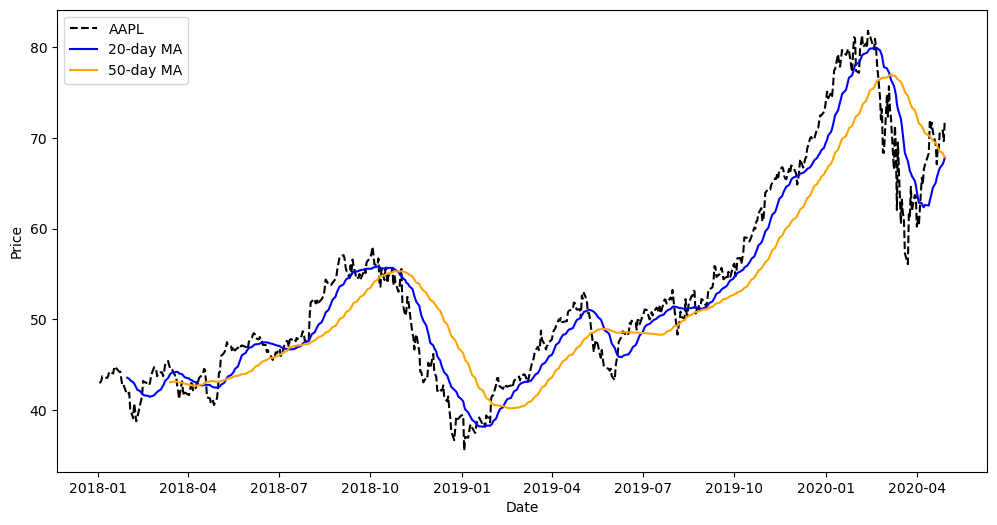

In [13]:
# Plot the stock prices and moving averages
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Close'], label='AAPL',color = 'k',linestyle='--')
ax.plot(ma20, label='20-day MA',color = 'blue')
ax.plot(ma50, label='50-day MA',color = 'orange')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()